In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import scipy
from scipy.stats import norm
from scipy.signal import argrelextrema
import os, glob

In [2]:
def get_maxes(folder):
    num_traces = len([entry for entry in os.listdir(folder) if os.path.isfile(os.path.join(folder, entry))])
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    
    avg_maxes_ch1 = []
    avg_maxes_ch4=[]
    counter = 0
    for f in csv_files:
        
        print(counter, f)
        data = pd.read_csv(f)
        ch1 = np.array(data['Maximum(1) (V)'])
        ch4 = np.array(data['Maximum(4) (V)'])
        

        # delete the largest arguments from both datasets (to take care of messy data and outliers)
        argument1 = np.where(ch1 > np.quantile(ch1, 0.95))
        argument2 = np.where(ch1 < np.quantile(ch1,0.05))
        argument3 = np.where(ch4 > np.quantile(ch4, 0.95))
        argument4 = np.where(ch4 < np.quantile(ch4,0.05))

    
        # create array of indecies of the data points we want to delete
        del_args = np.append(np.append(np.append(argument1, argument2), argument3), argument4)
    
        ch1 = np.delete(ch1, del_args)
        ch4 = np.delete(ch4, del_args)
        
        num_pts = len(ch1)
        
        avg_maxes_ch1.append(sum(ch1) / num_pts * 10 ** 3)
        avg_maxes_ch4.append(sum(ch4) / num_pts * 10 ** 3)
        
        counter = counter + 1
        
    
    return avg_maxes_ch1, avg_maxes_ch4, csv_files

In [3]:
ch1, ch4, filenames = get_maxes("dataset 1 -- one fibre")

0 dataset 1 -- one fibre/ATTN_D1_TC1H.csv
1 dataset 1 -- one fibre/ATTN_D1_TN2H.csv
2 dataset 1 -- one fibre/ATTN_D3_TC2H.csv
3 dataset 1 -- one fibre/ATTN_D2_TC2H.csv
4 dataset 1 -- one fibre/ATTN_D2_TC1H.csv
5 dataset 1 -- one fibre/ATTN_D3_TC1H.csv
6 dataset 1 -- one fibre/ATTN_D1_TC2H.csv
7 dataset 1 -- one fibre/ATTN_D2_TN2H.csv
8 dataset 1 -- one fibre/ATTN_D3_TN2H.csv


In [4]:
TC1H_ch1 = [ch1[0], ch1[4], ch1[5]]
TC1H_ch4 = [ch4[0], ch4[4], ch4[5]]

TN2H_ch1 = [ch1[1], ch1[7], ch1[8]]
TN2H_ch4 = [ch4[1], ch4[7], ch4[8]]

TC2H_ch1 = [ch1[6], ch1[4], ch1[3]]
TC2H_ch4 = [ch1[6], ch1[4], ch1[3]]

In [12]:
TC1H_ch4

[8.900038992042443, 6.595325785340305, 4.435035742444156]

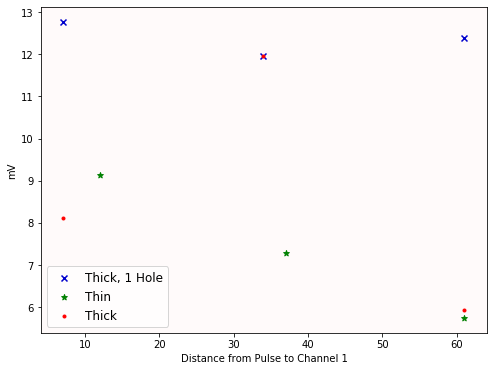

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

TC1H = plt.scatter([61, 34, 7],TC1H_ch1,color='mediumblue', marker='x');
#plt.scatter([1,2,3],TC1H_ch4,color='cornflowerblue', marker='x');


TN2H = plt.scatter([61, 37,12],TN2H_ch1,color='green', marker='*');
#plt.scatter([1,2,3],TN2H_ch4,color='pink', marker='*');

TC2H = plt.scatter([61, 34, 7],TC2H_ch1,color='red', marker='.');
#plt.scatter([1,2,3],TC2H_ch4,color='orange', marker='.');

plt.legend((TC1H, TN2H, TC2H), ("Thick, 1 Hole", "Thin", "Thick"), fontsize=12, frameon=True, loc='lower left')


plt.ylabel("mV")
plt.xlabel("Distance from Pulse to Channel 1")

plt.show()

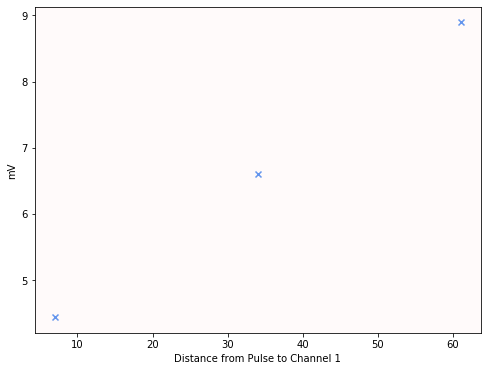

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

#TC1H = plt.scatter([61, 34, 7],TC1H_ch1,color='mediumblue', marker='x');
TC1H = plt.scatter([61, 34, 7],TC1H_ch4,color='cornflowerblue', marker='x');


#TN2H = plt.scatter([61, 37,12],TN2H_ch1,color='orchid', marker='*');
#TN2H = plt.scatter([61, 37,12],TN2H_ch4,color='green', marker='*');

#TC2H = plt.scatter([61, 34, 7],TC2H_ch1,color='darkorange', marker='.');
#TC2H = plt.scatter([61, 34, 7],TC2H_ch4,color='red', marker='.');

#plt.legend((TC1H, TN2H, TC2H), ("Thick, 1 Hole", "Thin", "Thick"), fontsize=12, frameon=True, loc='upper left')

plt.ylabel("mV")
plt.xlabel("Distance from Pulse to Channel 1")

plt.show()

In [20]:
ch1_2, ch4_2, filenames_2 = get_maxes("dataset 2 -- two fibre")

0 dataset 2 -- two fibre/ATTN_DD1_TC1H.csv
1 dataset 2 -- two fibre/ATTN_DD2_TC2H.csv
2 dataset 2 -- two fibre/ATTN_DD3_TC2H.csv
3 dataset 2 -- two fibre/ATTN_DD1_TN2H.csv
4 dataset 2 -- two fibre/ATTN_DD3_TC1H.csv
5 dataset 2 -- two fibre/ATTN_DD2_TC1H.csv
6 dataset 2 -- two fibre/ATTN_DD3_TN2H.csv
7 dataset 2 -- two fibre/ATTN_DD2_TN2H.csv
8 dataset 2 -- two fibre/ATTN_DD1_TC2H.csv


In [28]:
TC1H_ch1_2 = [ch1_2[0], ch1_2[5], ch1_2[4]]
TC1H_ch4_2 = [ch4_2[0], ch4_2[5], ch4_2[4]]

TN2H_ch1_2 = [ch1_2[3], ch1_2[7], ch1_2[6]]
TN2H_ch4_2 = [ch4_2[3], ch4_2[7], ch4_2[6]]

TC2H_ch1_2 = [ch1_2[8], ch1_2[1], ch1_2[2]]
TC2H_ch4_2 = [ch4_2[8], ch4_2[1], ch4_2[2]]

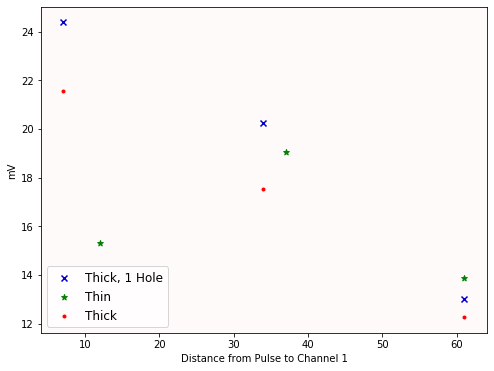

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

TC1H = plt.scatter([61, 34, 7],TC1H_ch1_2,color='mediumblue', marker='x');
#plt.scatter([1,2,3],TC1H_ch4,color='cornflowerblue', marker='x');


TN2H = plt.scatter([61, 37,12],TN2H_ch1_2,color='green', marker='*');
#plt.scatter([1,2,3],TN2H_ch4,color='pink', marker='*');

TC2H = plt.scatter([61, 34, 7],TC2H_ch1_2,color='red', marker='.');
#plt.scatter([1,2,3],TC2H_ch4,color='orange', marker='.');

plt.legend((TC1H, TN2H, TC2H), ("Thick, 1 Hole", "Thin", "Thick"), fontsize=12, frameon=True, loc='lower left')


plt.ylabel("mV")
plt.xlabel("Distance from Pulse to Channel 1")

plt.show()

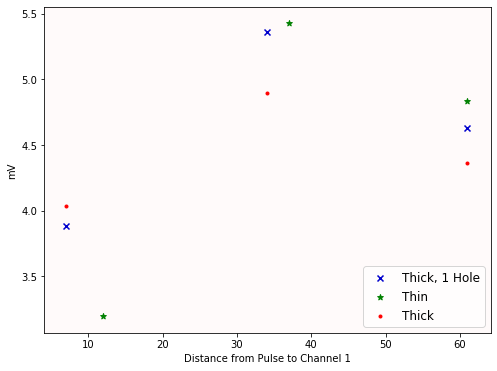

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

TC1H = plt.scatter([61, 34, 7],TC1H_ch4_2,color='mediumblue', marker='x');
#plt.scatter([1,2,3],TC1H_ch4,color='cornflowerblue', marker='x');


TN2H = plt.scatter([61, 37,12],TN2H_ch4_2,color='green', marker='*');
#plt.scatter([1,2,3],TN2H_ch4,color='pink', marker='*');

TC2H = plt.scatter([61, 34, 7],TC2H_ch4_2,color='red', marker='.');
#plt.scatter([1,2,3],TC2H_ch4,color='orange', marker='.');

plt.legend((TC1H, TN2H, TC2H), ("Thick, 1 Hole", "Thin", "Thick"), fontsize=12, frameon=True, loc='lower right')


plt.ylabel("mV")
plt.xlabel("Distance from Pulse to Channel 1")

plt.show()